In [1]:
import random as rand
import pandas as pd
import re
import emoji
import html
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [2]:
rand.seed(0)

In [3]:
training_df = pd.read_csv(r"C:/Users/Thomas/Desktop/training_data_new.csv")
training_df

C:\Users\Thomas\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,all_english_text,expanded_urls
0,0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,False,True,WuhanCoronaVirus KillerCuomo,us,Remember the #WuhanCoronaVirus? The pandemic w...,NaN
1,1,My sources @WhiteHouse say 2 tactics will be u...,NaN,False,True,Trump,us,My sources @WhiteHouse say 2 tactics will be u...,NaN
2,2,I'll venture a wild guess: If you were running...,NaN,False,True,COVID19,us,I'll venture a wild guess: If you were running...,https://www.science.org/content/article/new-wh...
3,3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,False,True,Pakistan GreenStimulus Nature Green,us,#Pakistan (#GreenStimulus = #Nature protection...,https://news.trust.org/item/20200717070925-r4m...
4,4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,False,True,coronavirus COVID__19 COVIDー19,us,🇺🇸 Pandemic of #Coronavirus: 30 American pasto...,NaN
...,...,...,...,...,...,...,...,...,...
239995,239995,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN,True,True,Mastеr,new_zealand,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN
239996,239996,Very interesting\nAny thoughts?\n\n#TheFive #T...,NaN,False,True,TheFive Trump2020 KAG2020 mondaythoughts COVID...,new_zealand,Very interesting\nAny thoughts?\n\n#TheFive #T...,https://twitter.com/Franck2Ausa/status/1287847...
239997,239997,As we deal with #COVID19 don't forget that #Ch...,NaN,True,True,COVID19 Christians persecution Nigeria,new_zealand,As we deal with #COVID19 don't forget that #Ch...,https://twitter.com/psjuk_official/status/1253...
239998,239998,"While we hit 150,000 in #COVID19 deaths, the P...",NaN,False,True,COVID19,new_zealand,"While we hit 150,000 in #COVID19 deaths, the P...",NaN


In [4]:
training_df['expanded_urls'] = training_df['expanded_urls'].fillna("")
training_df['expanded_urls'] = training_df['expanded_urls'].apply(lambda x: x.strip(" "))

In [5]:
training_df[:10]

,Unnamed: 0,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,all_english_text,expanded_urls
0,0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,False,True,WuhanCoronaVirus KillerCuomo,us,Remember the #WuhanCoronaVirus? The pandemic w...,
1,1,My sources @WhiteHouse say 2 tactics will be u...,NaN,False,True,Trump,us,My sources @WhiteHouse say 2 tactics will be u...,
2,2,I'll venture a wild guess: If you were running...,NaN,False,True,COVID19,us,I'll venture a wild guess: If you were running...,https://www.science.org/content/article/new-wh...
3,3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,False,True,Pakistan GreenStimulus Nature Green,us,#Pakistan (#GreenStimulus = #Nature protection...,https://news.trust.org/item/20200717070925-r4m9m/
4,4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,False,True,coronavirus COVID__19 COVIDー19,us,🇺🇸 Pandemic of #Coronavirus: 30 American pasto...,
5,5,So I made a meme....#corona #virus #meme #coro...,NaN,False,True,corona virus meme coronavirusmeme toilet paper...,us,I know the made a meme .... #crown #virus #mem...,https://twitter.com/reyna4321/status/123850627...
6,6,When I first saw the revised CDC figure—which ...,NaN,False,True,Coronavirus,us,When I first saw the revised CDC figure—which ...,
7,7,"Um, no one’s really listening to you. #blackli...",NaN,True,False,blacklifematters COVID19 StopPoliceBrutality,us,"Um, no one’s really listening to you. #blackli...",
8,8,ஆக்கப்பூர்வமான யோசனையை @CMOTamilNadu அரசுக்கு ...,NaN,False,True,corona,us,The DMK @CMotamilnadu told the government @ari...,https://twitter.com/iparanthamen/status/128767...
9,9,The Academy Might Be Postponing The Oscars\n\n...,NaN,False,False,TheAcademy AcademyAwards Oscars TheOscars AMPA...,us,The Academy Might Be Postponing The Oscars\n\n...,https://www.hollywoodnews.com/2020/05/19/the-a...


In [6]:
training_df.groupby('country')['is_retweet'].value_counts()

country      is_retweet
australia    TRUE          19713
             FALSE          9215
             True           7540
             False          3532
canada       True          25947
             False         14053
ireland      TRUE          25148
             FALSE         11459
             True           2304
             False          1088
             ireland           1
new_zealand  True          27658
             False         12342
uk           True          25743
             False         14257
us           True          27837
             False         12163
Name: is_retweet, dtype: int64

In [7]:
hashtags_df = pd.DataFrame(training_df.hashtags.str.split(' ').tolist(),
						index = training_df.country).stack()
hashtags_df = hashtags_df.reset_index([0, 'country'])
hashtags_df.columns = ['Country', 'Hashtag']

hashtags_df[:10]

,Country,Hashtag
0,us,WuhanCoronaVirus
1,us,KillerCuomo
2,us,Trump
3,us,COVID19
4,us,Pakistan
5,us,GreenStimulus
6,us,Nature
7,us,Green
8,us,coronavirus
9,us,COVID__19


In [8]:
topTenHashtags = hashtags_df['Hashtag'].value_counts()[:10].index
topTenHashtags

Index(['COVID19', 'coronavirus', 'Covid19', 'covid19', 'COVID', 'Coronavirus',
       'Covid_19', 'COVIDー19', 'Covid', 'StaySafe'],
      dtype='object')

In [9]:
countryValues = pd.crosstab(index = hashtags_df['Country'], columns = hashtags_df['Hashtag'])
countryValues

Hashtag,02JUL20,0613FM_0509,06strong,1-Jun,10-Jul,10-Jun,1000families,1000islands,1000lives,1000names,...,𝐛𝐫𝐞𝐚𝐭𝐡𝐞,𝐟𝐚𝐜𝐞𝐦𝐚𝐬𝐤𝐬,𝐟𝐚𝐜𝐞𝐬𝐡𝐢𝐞𝐥𝐝𝐬,𝐟𝐚𝐢𝐧𝐭,𝐨𝐱𝐲𝐠𝐞𝐧,𝑁𝑎𝑡𝑖𝑜𝑛𝑠𝑈𝑛𝑖𝑡𝑒𝑑,𝒟𝒾𝑒𝒷𝒪37,𝔊𝕯𝔏𝔈,𝗠𝗬𝗠,𝗦𝗢𝗟𝗗
Country,,,,,,,,,,,,,,,,,,,,,
australia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
canada,1,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
ireland,0,0,0,0,0,0,0,0,0,0,...,1,2,1,1,1,1,0,0,0,0
new_zealand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
uk,0,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,1,2,0,0
us,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
countryTopTenValues = countryValues[topTenHashtags]
countryTopTenValues

Hashtag,COVID19,coronavirus,Covid19,covid19,COVID,Coronavirus,Covid_19,COVIDー19,Covid,StaySafe
Country,,,,,,,,,,
australia,15268,4072,1522,2025,1575,987,1060,819,480,341
canada,15940,4172,1916,1629,1190,1174,1041,895,558,447
ireland,14535,3666,3812,1537,896,861,1386,959,705,1168
new_zealand,16680,3571,2303,1493,1764,1044,1158,1078,599,331
uk,13734,5292,2036,1454,1279,1375,1127,949,654,603
us,17054,4890,1053,1170,1795,1433,853,890,498,210


c:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Thomas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


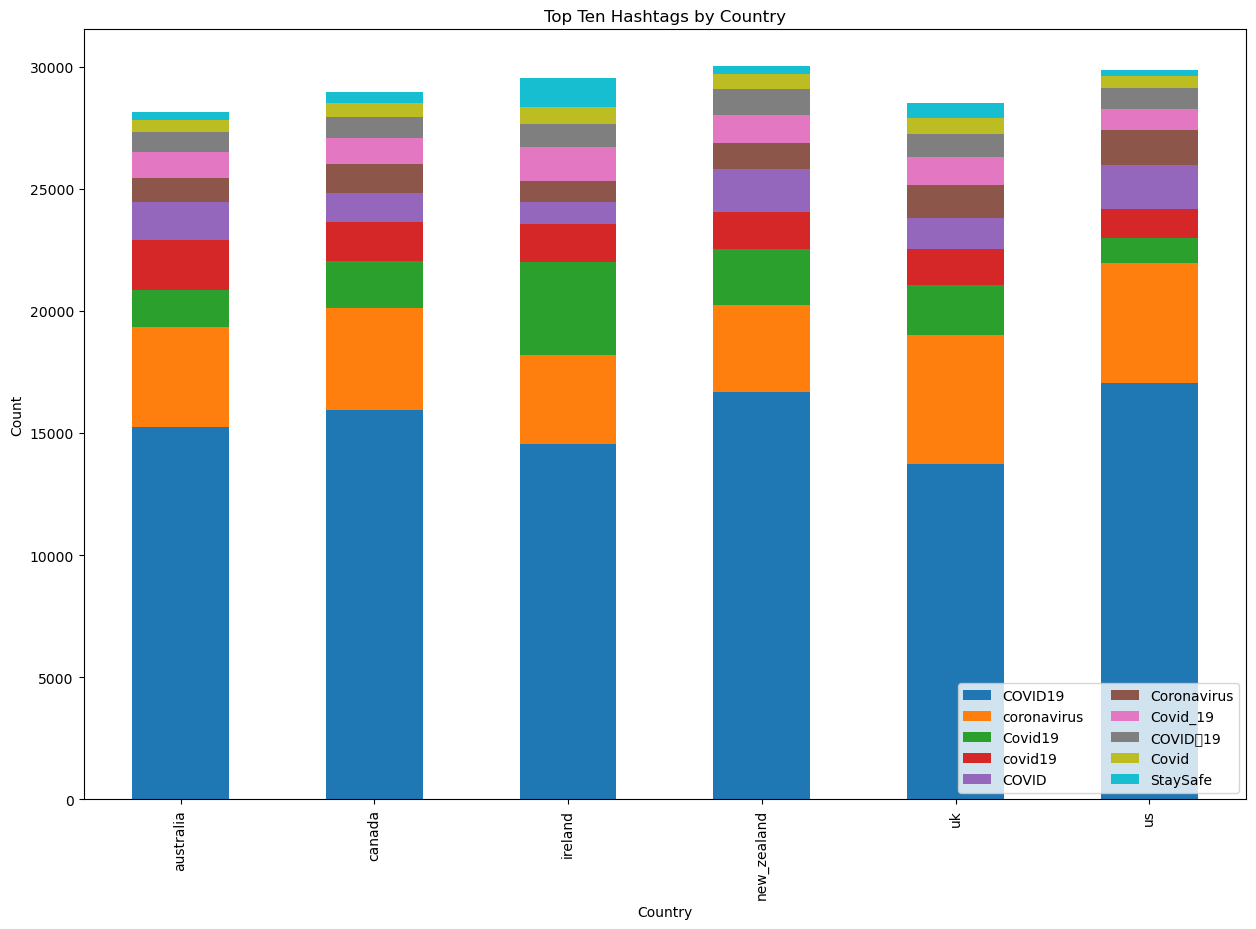

In [11]:
countryTopTenValues.plot(kind = 'bar', 
						 stacked = True,
						 figsize = (15,10))

plt.legend(loc="lower right", ncol=2)
plt.ylabel("Count")
plt.title("Top Ten Hashtags by Country")
plt.show()

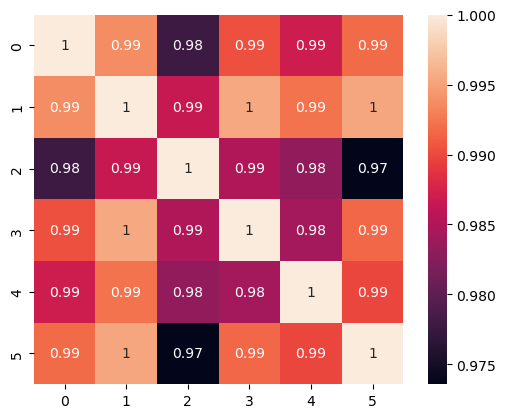

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

similarity = cosine_similarity(countryValues)

mask = np.zeros_like(similarity)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(similarity, square=True, annot=True)
plt.show()


In [13]:

from tqdm import tqdm
from bs4 import BeautifulSoup
import requests

session = requests.Session()
tqdm.pandas()

In [14]:
#expanding URLs
def expandUrls(tweet):
	urls = re.findall(r'(https?://\S+)', tweet)
	expanded = []
	for url in urls:
		try:
			expanded.append(session.head(url, allow_redirects=True, timeout=3).url)
		except:
			expanded.append(url)
	return expanded

In [15]:
expandUrls(training_df['text'][235000])

['https://paper.li/JacobTh85649736/1584426982?edition_id=5fe8a2a0-c40a-11ea-a3f9-0cc47a0d1605']

In [16]:
#expanded_urls = []                   
#for i in tqdm(range(len(training_df))):
	#expanded_urls.append(expandUrls(training_df['text'][i]))
#training_df['expanded_urls'] = expanded_urls

In [17]:
import string

In [18]:
training_df['text_remove_newline'] = training_df['all_english_text'].apply(lambda x: x.replace("\n", ""))
training_df['text_demojize'] = training_df['text_remove_newline'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))
training_df['cleaned_text'] = training_df['text_demojize'].apply(lambda x: re.sub(r' +', ' ', x))


In [19]:
training_df

,Unnamed: 0,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,all_english_text,expanded_urls,text_remove_newline,text_demojize,cleaned_text
0,0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,False,True,WuhanCoronaVirus KillerCuomo,us,Remember the #WuhanCoronaVirus? The pandemic w...,,Remember the #WuhanCoronaVirus? The pandemic w...,Remember the #WuhanCoronaVirus? The pandemic w...,Remember the #WuhanCoronaVirus? The pandemic w...
1,1,My sources @WhiteHouse say 2 tactics will be u...,NaN,False,True,Trump,us,My sources @WhiteHouse say 2 tactics will be u...,,My sources @WhiteHouse say 2 tactics will be u...,My sources @WhiteHouse say 2 tactics will be u...,My sources @WhiteHouse say 2 tactics will be u...
2,2,I'll venture a wild guess: If you were running...,NaN,False,True,COVID19,us,I'll venture a wild guess: If you were running...,https://www.science.org/content/article/new-wh...,I'll venture a wild guess: If you were running...,I'll venture a wild guess: If you were running...,I'll venture a wild guess: If you were running...
3,3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,False,True,Pakistan GreenStimulus Nature Green,us,#Pakistan (#GreenStimulus = #Nature protection...,https://news.trust.org/item/20200717070925-r4m9m/,#Pakistan (#GreenStimulus = #Nature protection...,#Pakistan (#GreenStimulus = #Nature protection...,#Pakistan (#GreenStimulus = #Nature protection...
4,4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,False,True,coronavirus COVID__19 COVIDー19,us,🇺🇸 Pandemic of #Coronavirus: 30 American pasto...,,🇺🇸 Pandemic of #Coronavirus: 30 American pasto...,United_States Pandemic of #Coronavirus: 30 A...,United_States Pandemic of #Coronavirus: 30 Am...
...,...,...,...,...,...,...,...,...,...,...,...,...
239995,239995,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN,True,True,Mastеr,new_zealand,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",,"Aa Likes, Retweets yentra 🙏🔥🔥🔥#Mastеr","Aa Likes, Retweets yentra folded_hands fire ...","Aa Likes, Retweets yentra folded_hands fire fi..."
239996,239996,Very interesting\nAny thoughts?\n\n#TheFive #T...,NaN,False,True,TheFive Trump2020 KAG2020 mondaythoughts COVID...,new_zealand,Very interesting\nAny thoughts?\n\n#TheFive #T...,https://twitter.com/Franck2Ausa/status/1287847...,Very interestingAny thoughts?#TheFive #Trump20...,Very interestingAny thoughts?#TheFive #Trump20...,Very interestingAny thoughts?#TheFive #Trump20...
239997,239997,As we deal with #COVID19 don't forget that #Ch...,NaN,True,True,COVID19 Christians persecution Nigeria,new_zealand,As we deal with #COVID19 don't forget that #Ch...,https://twitter.com/psjuk_official/status/1253...,As we deal with #COVID19 don't forget that #Ch...,As we deal with #COVID19 don't forget that #Ch...,As we deal with #COVID19 don't forget that #Ch...
239998,239998,"While we hit 150,000 in #COVID19 deaths, the P...",NaN,False,True,COVID19,new_zealand,"While we hit 150,000 in #COVID19 deaths, the P...",,"While we hit 150,000 in #COVID19 deaths, the P...","While we hit 150,000 in #COVID19 deaths, the P...","While we hit 150,000 in #COVID19 deaths, the P..."


In [20]:
from urllib.parse import urlparse

def getUrlWords(urls):
    info = []
    urls = urls.split(" ")
    if(urls != ['']):
        for url in urls:
            parsed_url = urlparse(url)
            split_slash = " ".join(parsed_url.path.split("/"))
            info.append(" ".join(split_slash.split('-')))
            
            if (parsed_url.netloc not in ['twitter.com', 't.co']):
                info.append(parsed_url.netloc)

    return " ".join(info)

In [21]:
training_df['url_info'] = training_df['expanded_urls'].apply(lambda x: getUrlWords(x))


In [22]:
training_df['final_text'] = training_df['cleaned_text'] + training_df['url_info']


In [62]:
training_df['final_text'][3]

'#Pakistan (#GreenStimulus = #Nature protection + #Green Jobs for community youth) - within this the recently announced #ProtectedAreasInitiative by @ImranKhanPTI is a major part of the post #COVID19 recovery plan https://t.co/pqsoCQ83DZ item 20200717070925 r4m9m  news.trust.org'

In [23]:
for i in range(5):
    print(training_df['final_text'][i])
    print()

Remember the #WuhanCoronaVirus? The pandemic where a great percentage of the deaths resulted from #KillerCuomo’s nursing home slaughter? The one where we were quarantined by Democrats? It’ll be back, rest assured, as soon as the riots stop. Anything to destroy Trump.

My sources @WhiteHouse say 2 tactics will be used to get America open &amp; #Trump reelected.1.) Cast doubts on all #COVID19 death numbers &amp; try to get Americans to disbelieve their health depts. &amp; @CDCgov rpts.and2.) Use Exec Order powers to "create demand" for...MORE

I'll venture a wild guess: If you were running the USA in a #COVID19 crisis you'd want our scientists working full bore, &amp; find $ to keep labs working.Yeah, well, labs all over USA are running out of time &amp; money &amp; #Trump admin is shrugging its shoulders.https://t.co/aG1ZYgeHuI content article new white house rules restrict use grant funding deal covid 19 impacts www.science.org

#Pakistan (#GreenStimulus = #Nature protection + #Green J

In [24]:
X = training_df['final_text']
y = training_df['country']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [26]:

from nltk.corpus import stopwords

In [27]:
from sklearn.naive_bayes import MultinomialNB

nb_pipeline = Pipeline([
  ("tf-idf", TfidfVectorizer(sublinear_tf = True, 
  							stop_words = 'english')),
  ("nb", MultinomialNB())
])
nb_pipeline.fit(X_train, y_train)

y_pred = nb_pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.48054166666666664


In [28]:
from sklearn.svm import LinearSVC

svc_pipeline = Pipeline([
 ("tf-idf", TfidfVectorizer(sublinear_tf = True, 
  							stop_words = 'english')),
  ("svc", LinearSVC())
])
svc_pipeline.fit(X=X_train, y=y_train)
y_pred = svc_pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.4721666666666667


In [29]:
#from sklearn.linear_model import LogisticRegression

#lr_pipeline = Pipeline([
#  ("tf-idf", TfidfVectorizer()),
#  ("lr", LogisticRegression(max_iter = 250))
#])
#lr_pipeline.fit(X_train, y_train)

#y_pred = lr_pipeline.predict(X_test)
#print(accuracy_score(y_test, y_pred))

In [30]:
test_df = pd.read_csv(r"C:/Users/Thomas/Desktop/test_data_new.csv")
test_df.head()

,text,reply_to_screen_name,is_quote,is_retweet,hashtags,Id,expanded_urls
0,"Ethical investing is not optional anymore, say...",NaN,False,False,covid19,0,['https://www.podbean.com/media/share/pb-uba6x...
1,#COVID19 | Suite à la conférence de presse du ...,NaN,False,True,COVID19,1,['https://twitter.com/gouvernementFR/status/13...
2,"Yesterday, I had a live discussion with @Steve...",NaN,False,True,COVID19,2,['https://www.cnn.com/world/live-news/coronavi...
3,Nepal - #Coronavirus cases up 24% in a week. D...,NaN,False,True,Coronavirus,3,['https://flutrackers.com/forum/forum/-2019-nc...
4,American economy jumped up a % big news story...,NaN,False,False,LysolAndCloroxSales,4,[nan]


In [31]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [32]:
numWords = 100000

In [33]:
tokenizer = Tokenizer(num_words=numWords, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(training_df['final_text'].values)
word_index = tokenizer.word_index
len(word_index)

574951

In [34]:
X = tokenizer.texts_to_sequences(training_df['final_text'].values)
X = pad_sequences(X, maxlen=150)

In [38]:
y = pd.get_dummies(training_df['country'])

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2)

In [41]:
modelSeq = Sequential()
modelSeq.add(Embedding(numWords, 32, input_length=X.shape[1]))
modelSeq.add(SpatialDropout1D(0.2))
modelSeq.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
modelSeq.add(Dense(6, activation='softmax'))
modelSeq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modelSeq.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 32)           3200000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 150, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 3,208,518
Trainable params: 3,208,518
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
epochs = 3
batch_size = 32

history = modelSeq.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

Epoch 1/3
4800/4800 [==============================] - 221s 46ms/step - loss: 1.4706 - accuracy: 0.4078 - val_loss: 1.3667 - val_accuracy: 0.4620
Epoch 2/3
4800/4800 [==============================] - 216s 45ms/step - loss: 1.2616 - accuracy: 0.5166 - val_loss: 1.3544 - val_accuracy: 0.4716
Epoch 3/3
4800/4800 [==============================] - 217s 45ms/step - loss: 1.1405 - accuracy: 0.5700 - val_loss: 1.3787 - val_accuracy: 0.4732


In [44]:
accr = modelSeq.evaluate(X_test,Y_test)

1500/1500 [==============================] - 8s 5ms/step - loss: 1.3854 - accuracy: 0.4737


In [45]:
from tensorflow.keras import layers
import tensorflow as tf

In [46]:
class DCNN(tf.keras.Model):
    
	def __init__(self,
					vocab_size,  #Size of the vocabulary used
					emb_dim=128,  #Embedding dimension
					nb_filters=50,  #Number of times we want to apply each filter
					FFN_units=512,  #Number of units of the feedforward neural network at the end
					nb_classes=6,  #Binary classification as default
					dropout_rate=0.1,  #To turn off certain units/parameters to avoid overfitting
					training=False,  #True if the network is in evaluation phase. Drop out will be applied only in training
					name="dcnn"):  #A name for the network
		super(DCNN, self).__init__(name=name)

		self.embedding = layers.Embedding(vocab_size,
											emb_dim)
		self.bigram = layers.Conv1D(filters=nb_filters,
									kernel_size=2,
									padding="valid",  #To add the zeros we need to performe the last convolutions
									activation="relu")
		self.trigram = layers.Conv1D(filters=nb_filters,
									kernel_size=3,
									padding="valid",  #To add the zeros we need to performe the last convolutions
									activation="relu")
		self.fourgram = layers.Conv1D(filters=nb_filters,
									kernel_size=4,
									padding="valid",  #To add the zeros we need to performe the last convolutions
									activation="relu")
		self.pool = layers.GlobalMaxPool1D()  #We'll be using this layer for all pooling steps
		self.dense_1 = layers.Dense(units=FFN_units, activation="relu")
		self.dropout = layers.Dropout(rate=dropout_rate)  #This is a good place to define dropout since dense_1 with create a lot of params
		self.last_dense = layers.Dense(units=nb_classes,activation="softmax")

	def call(self, inputs, training):
		x = self.embedding(inputs)
		x_1 = self.bigram(x)
		x_1 = self.pool(x_1)
		x_2 = self.trigram(x)
		x_2 = self.pool(x_2)
		x_3 = self.fourgram(x)
		x_3 = self.pool(x_3)

		merged = tf.concat([x_1, x_2, x_3], axis=-1)  #(batch_size, 3 * nb_filters) 3 because we have 3 types of filters
		merged = self.dense_1(merged)  #Staring the feedforward process
		merged = self.dropout(merged, training)  #Applying dropout if training=True
		output = self.last_dense(merged)  

		return output

In [47]:
VOCAB_SIZE = 150000

#These are basicaly hyperparameters
EMB_DIM = 100
NB_FILTERS = 100
FFN_UNITS = 128
NB_CLASSES = 6

DROPOUT_RATE = 0.2

BATCH_SIZE = 32
NB_EPOCHS = 3

In [48]:
dcnn = DCNN(vocab_size=VOCAB_SIZE,
            emb_dim=EMB_DIM,
            nb_filters=NB_FILTERS,
            FFN_units=FFN_UNITS,
            nb_classes=NB_CLASSES,
            dropout_rate=DROPOUT_RATE)

In [49]:
dcnn.compile(loss="categorical_crossentropy",  #Standard loss when doing a multiclass classification
                 optimizer="adam",
                 metrics=['accuracy'])

In [50]:
dcnn.fit(X_train, 
         Y_train,
         batch_size=BATCH_SIZE,
         epochs=NB_EPOCHS,
		 validation_split=0.2)

Epoch 1/3
4800/4800 [==============================] - 534s 111ms/step - loss: 1.4311 - accuracy: 0.4284 - val_loss: 1.3351 - val_accuracy: 0.4780
Epoch 2/3
4800/4800 [==============================] - 534s 111ms/step - loss: 1.1882 - accuracy: 0.5472 - val_loss: 1.3549 - val_accuracy: 0.4810
Epoch 3/3
4800/4800 [==============================] - 539s 112ms/step - loss: 0.9417 - accuracy: 0.6458 - val_loss: 1.4991 - val_accuracy: 0.4740


In [51]:
results = dcnn.evaluate(X_test, Y_test, batch_size=BATCH_SIZE)

1500/1500 [==============================] - 6s 4ms/step - loss: 1.5097 - accuracy: 0.4725


In [81]:
test_df = pd.read_csv(r"C:/Users/Thomas/Desktop/test_data_new.csv")
test_df

,Unnamed: 0,text,reply_to_screen_name,is_quote,is_retweet,hashtags,Id,expanded_urls,all_english_text
0,0,"Ethical investing is not optional anymore, say...",NaN,False,False,covid19,0,https://www.podbean.com/media/share/pb-uba6x-d...,"Ethical investing is not optional anymore, say..."
1,1,#COVID19 | Suite à la conférence de presse du ...,NaN,False,True,COVID19,1,https://twitter.com/gouvernementFR/status/1332...,#COVID19 | Following the Prime Minister's pres...
2,2,"Yesterday, I had a live discussion with @Steve...",NaN,False,True,COVID19,2,https://www.cnn.com/world/live-news/coronaviru...,"Yesterday, I had a live discussion with @Steve..."
3,3,Nepal - #Coronavirus cases up 24% in a week. D...,NaN,False,True,Coronavirus,3,https://flutrackers.com/forum/forum/-2019-ncov...,Nepal - #Coronavirus cases up 24% in a week. D...
4,4,American economy jumped up a % big news story...,NaN,False,False,LysolAndCloroxSales,4,NaN,American economy jumped up a % big news story...
...,...,...,...,...,...,...,...,...,...
59995,59995,Who knew all we had to do was eat a tenner’s w...,NaN,False,True,Covid19,59995,https://twitter.com/ShaneBeattyNews/status/127...,Who knew all we had to do was eat a tenner’s w...
59996,59996,"Our death toll of more than 160,000 souls tell...",NaN,False,True,coronavirus,59996,https://twitter.com/TeamPelosi/status/12919060...,"Our death toll of more than 160,000 souls tell..."
59997,59997,"Apparently, Donald Trump doesn't care about Am...",NaN,False,True,COVID19,59997,NaN,"Apparently, Donald Trump doesn't care about Am..."
59998,59998,Is #HulaHooping the perfect #SocialDistancing ...,NaN,False,False,HulaHooping SocialDistancing London,59998,https://www.swlondoner.co.uk/life/08072020-hul...,Is #HulaHooping the perfect #SocialDistancing ...


In [82]:
test_df['expanded_urls'] = test_df['expanded_urls'].fillna("")
test_df['expanded_urls'] = test_df['expanded_urls'].apply(lambda x: x.strip(" "))

In [83]:
test_df['text_remove_newline'] = test_df['all_english_text'].apply(lambda x: x.replace("\n", ""))
test_df['text_demojize'] = test_df['text_remove_newline'].apply(lambda x: emoji.demojize(x, delimiters=(" ", " ")))
test_df['remove_links'] = test_df['text_demojize'].apply(lambda x: re.sub(r'http\S+', ' ', x)) 
test_df['cleaned_text'] = test_df['remove_links'].apply(lambda x: re.sub(r' +', ' ', x))
test_df['url_info'] = test_df['expanded_urls'].apply(lambda x: getUrlWords(x))
test_df['final_text'] = test_df['cleaned_text'] + test_df['url_info']


In [84]:
test_df['final_text'][11]

'Pls RT: An upcoming Report by @Kaleidoscope_T and @CWEquality is exposing the devastating ways in which the #COVID19 pandemic is affecting our #LGBTI+ siblings in the #Commonwealth. Please support and donate if you can #fundraising #humanrights #campaign  covid 19  www.kaleidoscopetrust.com  MsLadyPhyll status 1258470166314303489 photo 1'

## Making A Submission

In [ ]:
#test_y_pred = nb_pipeline.predict(test_df['final_text'])
#test_y_pred

In [ ]:
#submission = pd.DataFrame()
#submission["Id"] = test_df["Id"]
#submission["Category"] = test_y_pred
#submission.head()

In [ ]:
#submission.to_csv("/home/tdurkin/Desktop/submission.csv", index=False)